# **Elevating Aviation Excellence**
### **MetroMove Transit Solutions**: A leading public transportation service provider of efficient, affordable, and timely public transportation services operating in multiple cities
### Aim: OPTIMIZING PUBLIC TRANSIT OPERATIONS
## **Data** **Dictionary**

### **Mode_of_Transport**: Type of transport used: Bus, Train, Ferry, or Tram (includes inconsistencies)
### **Departure_Station**: Station where the trip starts (contains whitespace errors)
### **Arrival_Station**: Station where the trip ends (inconsistent casing)
### **Departure_Time**: Exact date and time when the trip departed
### **Passenger_Count**: Number of passengers on the trip (includes missing values)
### **Fare_Amount**: Amount paid by the passengers for the trip (includes missing values)
### **Trip_Duration_Minutes**: Duration of the trip in minutes (includes missing values)
### **Trip_Date**: Date on which the trip occurred
### **Day_of_Week**: Day of the week on which the trip occurred

# Import the libraries

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns  
import missingno as msno  
from collections import Counter 

In [2]:
pip install openpyxl

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [3]:
df = pd.read_excel("Public_Transport_Trips_EDA.xlsx")

In [4]:
df.head()

,Trip_ID,Mode_of_Transport,Departure_Station,Arrival_Station,Departure_Time,Passenger_Count,Fare_Amount,Trip_Duration_Minutes,Trip_Date,Day_of_Week,Unnamed: 10,Unnamed: 11
0,TRIP0001,FERRY,West End,airport,2024-01-01 06:00:00,21.0,4.343642,26.0,2024-01-01,Sunday,NaN,F
1,TRIP0002,Tram,North Station,Downtown,2024-01-01 06:01:00,46.0,20.673380,134.0,2024-01-01,Saturday,NaN,F
2,TRIP0003,bus,Central,North Station,2024-01-01 06:02:00,91.0,NaN,NaN,2024-01-01,Tuesday,NaN,F
3,TRIP0004,FERRY,Downtown,Central,2024-01-01 06:03:00,27.0,3.767487,NaN,2024-01-01,Sunday,NaN,F
4,TRIP0005,Ferry,Downtown,Central,2024-01-01 06:04:00,66.0,NaN,NaN,2024-01-01,Monday,NaN,F


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Trip_ID                1000 non-null   object        
 1   Mode_of_Transport      1000 non-null   object        
 2   Departure_Station      1000 non-null   object        
 3   Arrival_Station        1000 non-null   object        
 4   Departure_Time         1000 non-null   datetime64[ns]
 5   Passenger_Count        900 non-null    float64       
 6   Fare_Amount            900 non-null    float64       
 7   Trip_Duration_Minutes  900 non-null    float64       
 8   Trip_Date              1000 non-null   datetime64[ns]
 9   Day_of_Week            1000 non-null   object        
 10  Unnamed: 10            0 non-null      float64       
 11  Unnamed: 11            299 non-null    object        
dtypes: datetime64[ns](2), float64(4), object(6)
memory usage: 93.9+

In [6]:
df.columns

Index(['Trip_ID', 'Mode_of_Transport', 'Departure_Station', 'Arrival_Station',
       'Departure_Time', 'Passenger_Count', 'Fare_Amount',
       'Trip_Duration_Minutes', 'Trip_Date', 'Day_of_Week', 'Unnamed: 10',
       'Unnamed: 11'],
      dtype='object')

In [7]:
df.tail()

,Trip_ID,Mode_of_Transport,Departure_Station,Arrival_Station,Departure_Time,Passenger_Count,Fare_Amount,Trip_Duration_Minutes,Trip_Date,Day_of_Week,Unnamed: 10,Unnamed: 11
995,TRIP0996,train,North Station,West End,2024-01-01 22:35:00,NaN,40.546670,51.0,2024-02-11,Saturday,NaN,NaN
996,TRIP0997,Bus,Central,West End,2024-01-01 22:36:00,63.0,7.772635,35.0,2024-02-11,Thursday,NaN,NaN
997,TRIP0998,FERRY,West End,North Station,2024-01-01 22:37:00,23.0,NaN,8.0,2024-02-11,Saturday,NaN,NaN
998,TRIP0999,Tram,South Point,Central,2024-01-01 22:38:00,9.0,43.300617,169.0,2024-02-11,Sunday,NaN,NaN
999,TRIP1000,train,Airport,West End,2024-01-01 22:39:00,34.0,8.168803,21.0,2024-02-11,Tuesday,NaN,NaN


In [8]:
df.shape

(1000, 12)

In [9]:
# Numerical Statistical Analysis
df.describe()

,Departure_Time,Passenger_Count,Fare_Amount,Trip_Duration_Minutes,Trip_Date,Unnamed: 10
count,1000,900.000000,900.000000,900.000000,1000,0.0
mean,2024-01-01 14:19:30,49.154444,25.360742,94.270000,2024-01-21 08:03:50.400000,NaN
min,2024-01-01 06:00:00,1.000000,0.500576,5.000000,2024-01-01 00:00:00,NaN
25%,2024-01-01 10:09:45,25.000000,12.818196,49.750000,2024-01-11 00:00:00,NaN
50%,2024-01-01 14:19:30,48.000000,25.403856,97.500000,2024-01-21 00:00:00,NaN
75%,2024-01-01 18:29:15,72.000000,37.866623,138.000000,2024-02-01 00:00:00,NaN
max,2024-01-01 22:39:00,99.000000,49.945184,179.000000,2024-02-11 00:00:00,NaN
std,NaN,27.698270,14.464556,50.634982,NaN,NaN


In [10]:
# Categorical Statistical Analysis
df.describe(include=["object", "bool"])

,Trip_ID,Mode_of_Transport,Departure_Station,Arrival_Station,Day_of_Week,Unnamed: 11
count,1000,1000,1000,1000,1000,299
unique,1000,9,7,7,7,2
top,TRIP0001,Bus,North Station,South Point,Sunday,F
freq,1,147,171,171,167,250


# Haddling the missing data

In [11]:
# Investigate the missing data
null_vals = df.isnull().sum()
null_vals

Trip_ID                     0
Mode_of_Transport           0
Departure_Station           0
Arrival_Station             0
Departure_Time              0
Passenger_Count           100
Fare_Amount               100
Trip_Duration_Minutes     100
Trip_Date                   0
Day_of_Week                 0
Unnamed: 10              1000
Unnamed: 11               701
dtype: int64

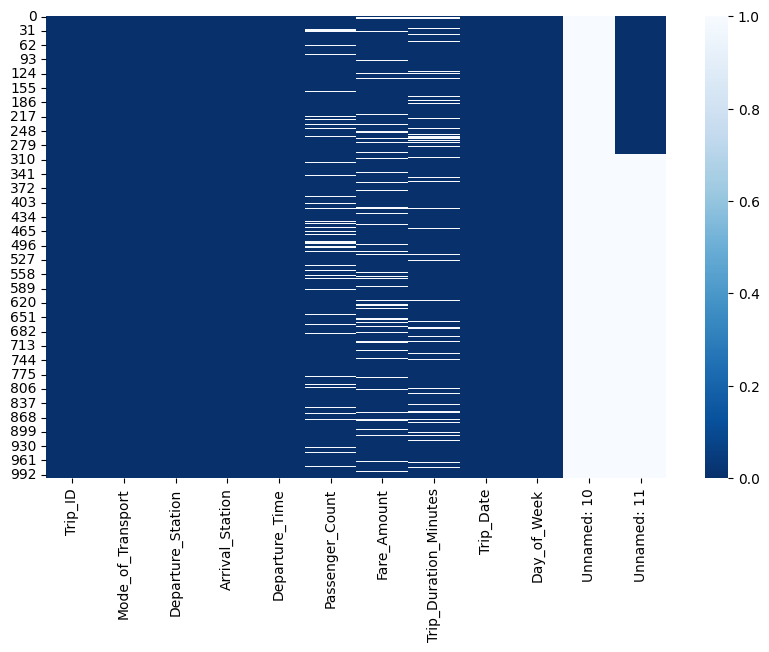

In [12]:
# Visualize the missing data
plt.figure(figsize = (10, 6))
sns.heatmap(df.isnull(), cbar=True, cmap="Blues_r"); # color bar (cbar) and color map (cmap)

<Axes: >

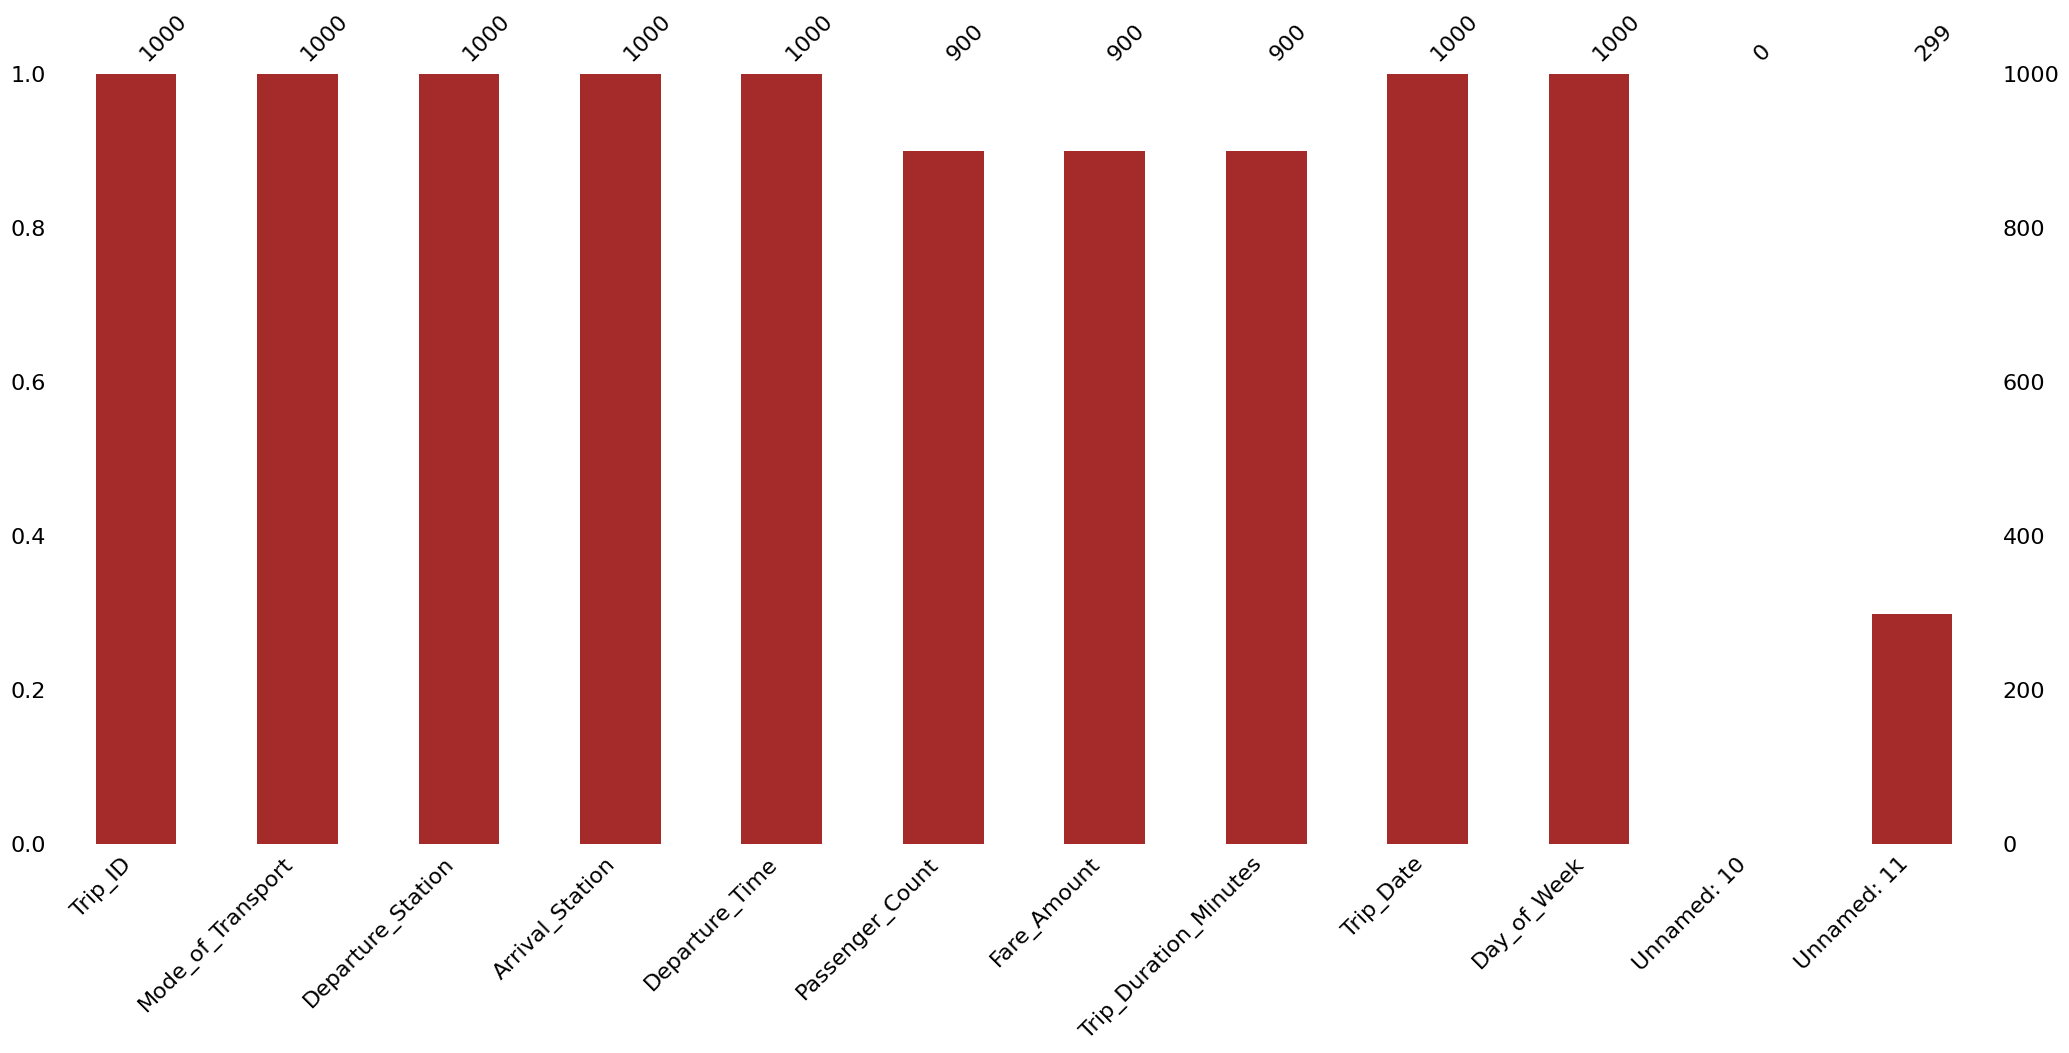

In [13]:
# Using missingno to visualize the missing data
msno.bar(df, color="brown")

# Displaying where the missing data exists 
### Missing values identified where the true values 

In [14]:
df.isnull()

,Trip_ID,Mode_of_Transport,Departure_Station,Arrival_Station,Departure_Time,Passenger_Count,Fare_Amount,Trip_Duration_Minutes,Trip_Date,Day_of_Week,Unnamed: 10,Unnamed: 11
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,True,True,False,False,True,False
3,False,False,False,False,False,False,False,True,False,False,True,False
4,False,False,False,False,False,False,True,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
995,False,False,False,False,False,True,False,False,False,False,True,True
996,False,False,False,False,False,False,False,False,False,False,True,True
997,False,False,False,False,False,False,True,False,False,False,True,True
998,False,False,False,False,False,False,False,False,False,False,True,True


In [15]:
df[df.isnull().any(axis=1)]

,Trip_ID,Mode_of_Transport,Departure_Station,Arrival_Station,Departure_Time,Passenger_Count,Fare_Amount,Trip_Duration_Minutes,Trip_Date,Day_of_Week,Unnamed: 10,Unnamed: 11
0,TRIP0001,FERRY,West End,airport,2024-01-01 06:00:00,21.0,4.343642,26.0,2024-01-01,Sunday,NaN,F
1,TRIP0002,Tram,North Station,Downtown,2024-01-01 06:01:00,46.0,20.673380,134.0,2024-01-01,Saturday,NaN,F
2,TRIP0003,bus,Central,North Station,2024-01-01 06:02:00,91.0,NaN,NaN,2024-01-01,Tuesday,NaN,F
3,TRIP0004,FERRY,Downtown,Central,2024-01-01 06:03:00,27.0,3.767487,NaN,2024-01-01,Sunday,NaN,F
4,TRIP0005,Ferry,Downtown,Central,2024-01-01 06:04:00,66.0,NaN,NaN,2024-01-01,Monday,NaN,F
...,...,...,...,...,...,...,...,...,...,...,...,...
995,TRIP0996,train,North Station,West End,2024-01-01 22:35:00,NaN,40.546670,51.0,2024-02-11,Saturday,NaN,NaN
996,TRIP0997,Bus,Central,West End,2024-01-01 22:36:00,63.0,7.772635,35.0,2024-02-11,Thursday,NaN,NaN
997,TRIP0998,FERRY,West End,North Station,2024-01-01 22:37:00,23.0,NaN,8.0,2024-02-11,Saturday,NaN,NaN
998,TRIP0999,Tram,South Point,Central,2024-01-01 22:38:00,9.0,43.300617,169.0,2024-02-11,Sunday,NaN,NaN


In [16]:
# Strip whitespace from column names
df.columns = df.columns.str.strip()

# Fill missing values (in place)
df["Passenger_Count"].fillna(df["Passenger_Count"].median(), inplace=True)
df["Fare_Amount"].fillna(df["Fare_Amount"].median(), inplace=True)
df["Trip_Duration_Minutes"].fillna(df["Trip_Duration_Minutes"].median(), inplace=True)

# Drop all unnamed columns (in place)
df.drop(columns=df.columns[df.columns.str.contains('^Unnamed')], inplace=True)

C:\Users\iheom\AppData\Local\Temp\ipykernel_44636\1960765617.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Passenger_Count"].fillna(df["Passenger_Count"].median(), inplace=True)
C:\Users\iheom\AppData\Local\Temp\ipykernel_44636\1960765617.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always b

In [17]:
# Strip whitespace from column names
df.columns = df.columns.str.strip()

# Fill missing values safely (no warnings)
df.fillna({
    "Passenger_Count": df["Passenger_Count"].median(),
    "Fare_Amount": df["Fare_Amount"].median(),
    "Trip_Duration_Minutes": df["Trip_Duration_Minutes"].median()
}, inplace=True)

# Drop all unnamed columns in place
df.drop(columns=df.columns[df.columns.str.contains('^Unnamed')], inplace=True)

In [18]:
df.isnull().sum()

Trip_ID                  0
Mode_of_Transport        0
Departure_Station        0
Arrival_Station          0
Departure_Time           0
Passenger_Count          0
Fare_Amount              0
Trip_Duration_Minutes    0
Trip_Date                0
Day_of_Week              0
dtype: int64

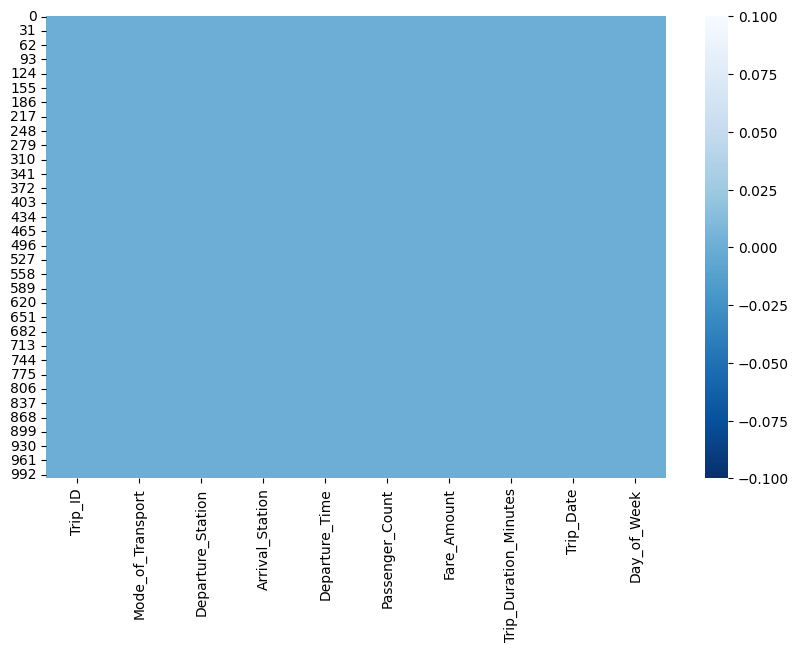

In [19]:
# Confirming removal of missing data
# Visualize the missing data
plt.figure(figsize = (10, 6))
sns.heatmap(df.isnull(), cbar=True, cmap="Blues_r"); # color bar (cbar) and color map (cmap)

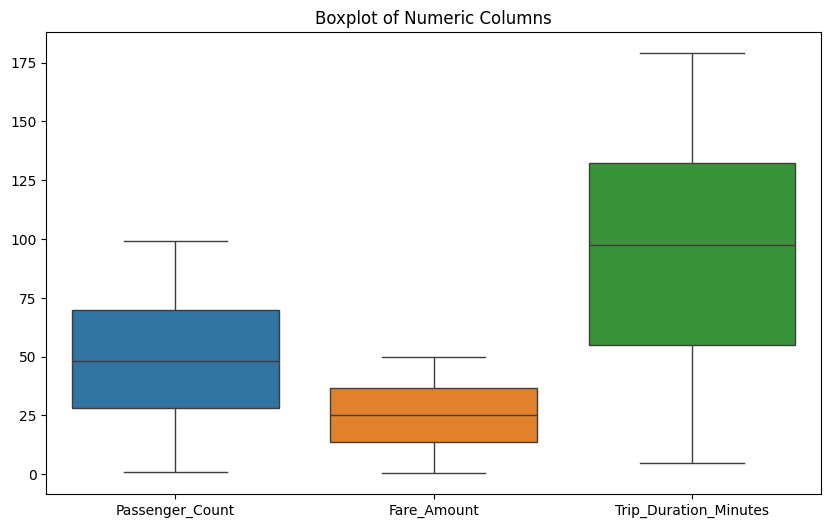

In [20]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df)
plt.title("Boxplot of Numeric Columns")
plt.show()

In [21]:
# Check for duplicate data
df.duplicated().sum()

np.int64(0)

In [22]:
df.columns

Index(['Trip_ID', 'Mode_of_Transport', 'Departure_Station', 'Arrival_Station',
       'Departure_Time', 'Passenger_Count', 'Fare_Amount',
       'Trip_Duration_Minutes', 'Trip_Date', 'Day_of_Week'],
      dtype='object')

In [23]:
len(df)

1000

In [24]:
df.shape

(1000, 10)

# Handling outliers

### Outliers in numerical columns

In [25]:
numerical_columns = df.select_dtypes(include="number")

In [26]:
numerical_columns

,Passenger_Count,Fare_Amount,Trip_Duration_Minutes
0,21.0,4.343642,26.0
1,46.0,20.673380,134.0
2,91.0,25.403856,97.5
3,27.0,3.767487,97.5
4,66.0,25.403856,97.5
...,...,...,...
995,48.0,40.546670,51.0
996,63.0,7.772635,35.0
997,23.0,25.403856,8.0
998,9.0,43.300617,169.0


In [27]:
# Length of numerical columns
len(numerical_columns.columns)

3

### Investigating the numerical columns for outliers by visualizing their distributions on histplots

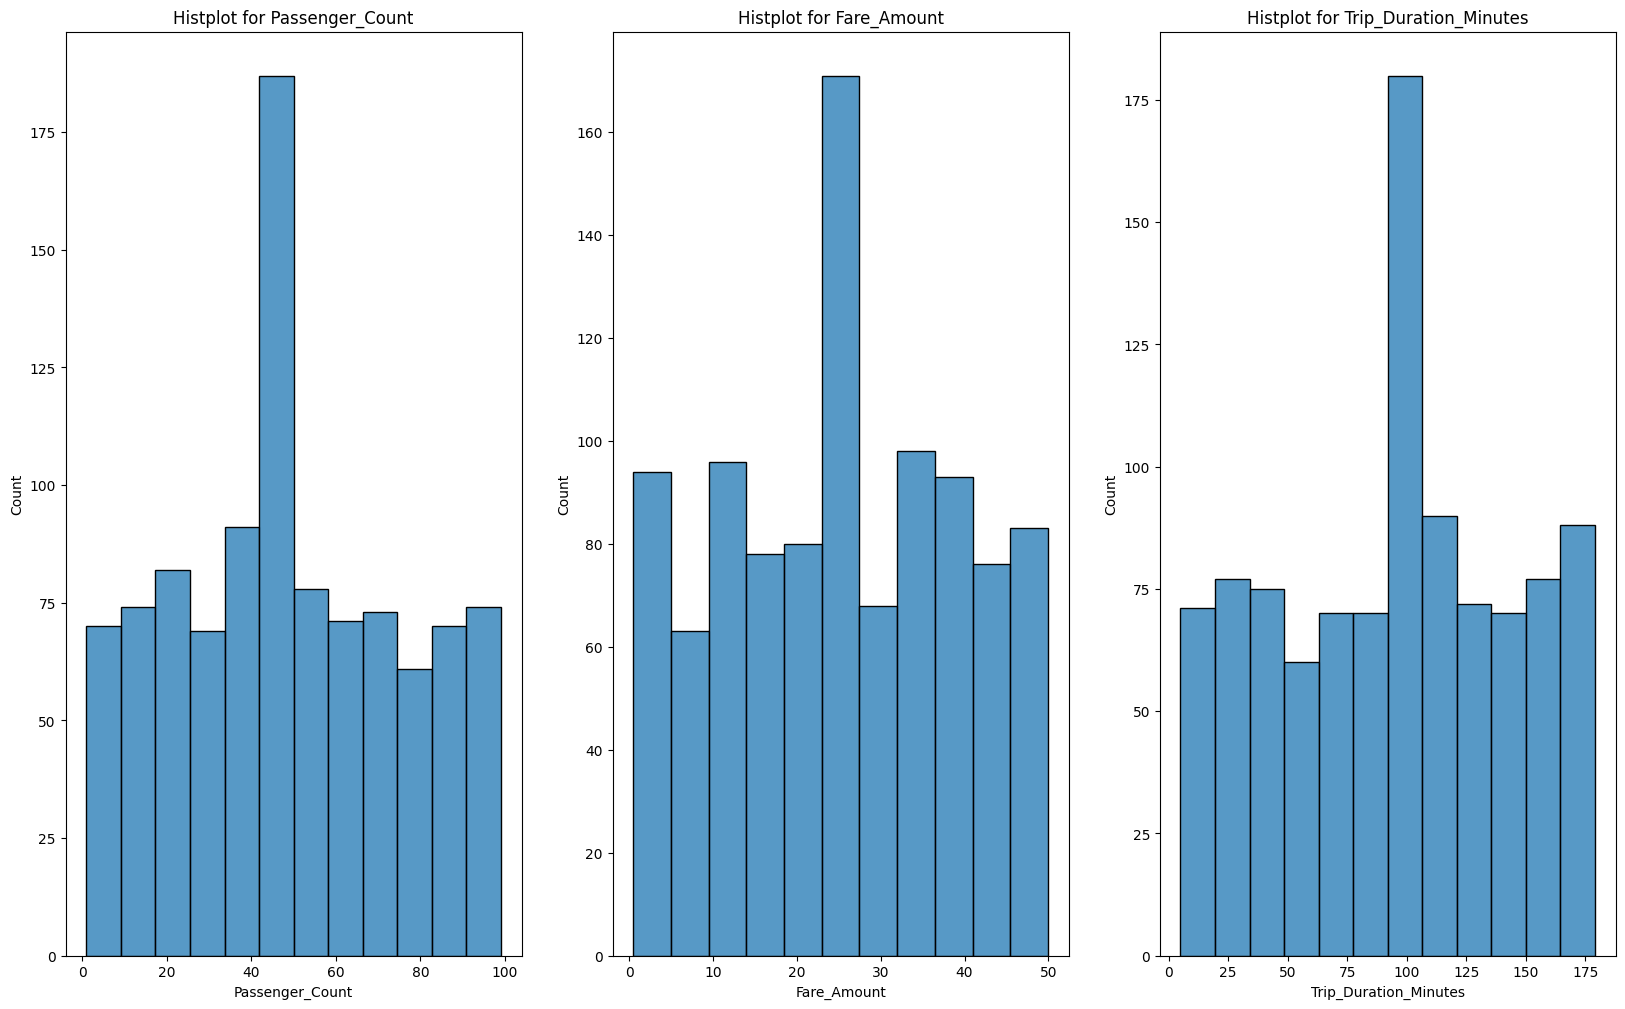

In [28]:
fig,ax = plt.subplots(nrows=1, ncols=3, figsize=(20,12))
ax=ax.flatten()
for idx, col in enumerate(numerical_columns):
    sns.histplot(df[col], ax=ax[idx])
    ax[idx].set_title(f"Histplot for {col}")

### ***Insights:*** The Passenger_Count, Fare_Amount, and Trip_Duration_Minutes show fairly uniform distributions without long tails or extreme skewness — visually, nothing suggests strong outliers from these.

### Investigate the outliers using a boxplot

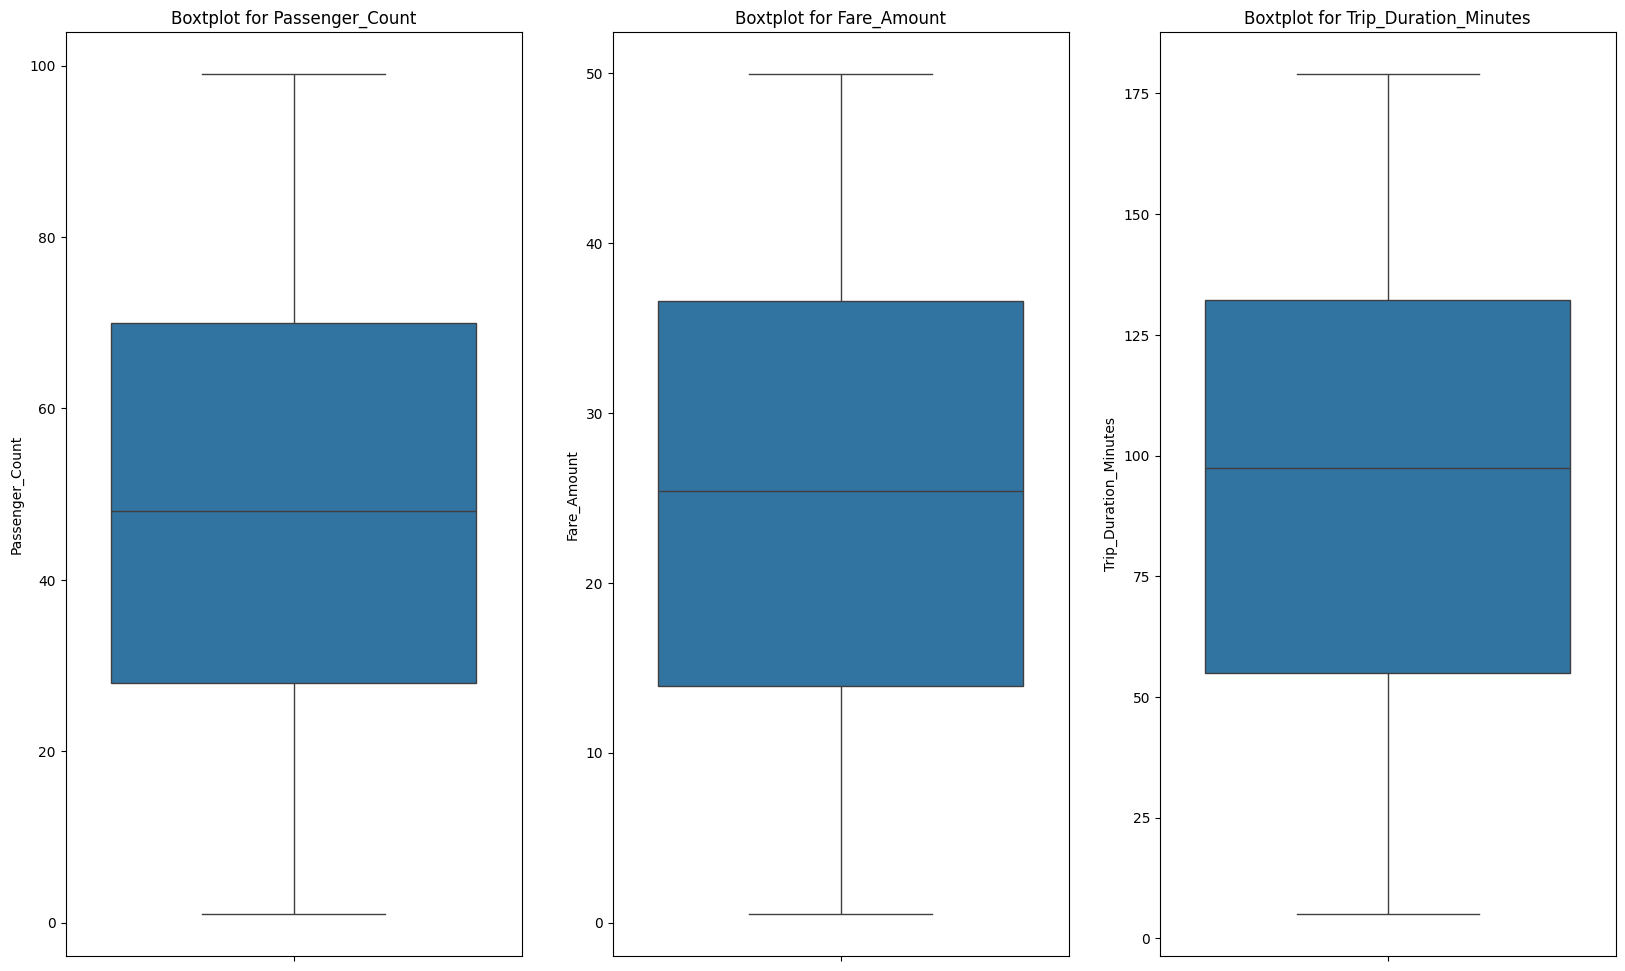

In [29]:
fig,ax = plt.subplots(nrows=1, ncols=3, figsize=(20,12))
ax=ax.flatten()
for idx, col in enumerate(numerical_columns):
    sns.boxplot(df[col], ax=ax[idx])
    ax[idx].set_title(f"Boxtplot for {col}")

### ***Insight:*** There are no visible outliers in your data based on these boxplots. The distributions appear clean and consistent.

In [30]:
df.head(2)

,Trip_ID,Mode_of_Transport,Departure_Station,Arrival_Station,Departure_Time,Passenger_Count,Fare_Amount,Trip_Duration_Minutes,Trip_Date,Day_of_Week
0,TRIP0001,FERRY,West End,airport,2024-01-01 06:00:00,21.0,4.343642,26.0,2024-01-01,Sunday
1,TRIP0002,Tram,North Station,Downtown,2024-01-01 06:01:00,46.0,20.673380,134.0,2024-01-01,Saturday


In [31]:
df.head(20)

,Trip_ID,Mode_of_Transport,Departure_Station,Arrival_Station,Departure_Time,Passenger_Count,Fare_Amount,Trip_Duration_Minutes,Trip_Date,Day_of_Week
0,TRIP0001,FERRY,West End,airport,2024-01-01 06:00:00,21.0,4.343642,26.0,2024-01-01,Sunday
1,TRIP0002,Tram,North Station,Downtown,2024-01-01 06:01:00,46.0,20.673380,134.0,2024-01-01,Saturday
2,TRIP0003,bus,Central,North Station,2024-01-01 06:02:00,91.0,25.403856,97.5,2024-01-01,Tuesday
3,TRIP0004,FERRY,Downtown,Central,2024-01-01 06:03:00,27.0,3.767487,97.5,2024-01-01,Sunday
4,TRIP0005,Ferry,Downtown,Central,2024-01-01 06:04:00,66.0,25.403856,97.5,2024-01-01,Monday
5,TRIP0006,fErry,South Point,South Point,2024-01-01 06:05:00,41.0,5.994406,50.0,2024-01-01,Thursday
6,TRIP0007,bus,West End,West End,2024-01-01 06:06:00,13.0,40.507643,100.0,2024-01-01,Saturday
7,TRIP0008,FERRY,Central,South Point,2024-01-01 06:07:00,9.0,25.403856,14.0,2024-01-01,Saturday
8,TRIP0009,Train,West End,North Station,2024-01-01 06:08:00,36.0,4.079666,172.0,2024-01-01,Saturday
9,TRIP0010,Ferry,Central,South Point,2024-01-01 06:09:00,86.0,47.778203,132.0,2024-01-01,Wednesday


In [32]:
df.tail(20)

,Trip_ID,Mode_of_Transport,Departure_Station,Arrival_Station,Departure_Time,Passenger_Count,Fare_Amount,Trip_Duration_Minutes,Trip_Date,Day_of_Week
980,TRIP0981,train,Central,North Station,2024-01-01 22:20:00,65.0,48.667301,39.0,2024-02-10,Tuesday
981,TRIP0982,Tram,Central,Downtown,2024-01-01 22:21:00,36.0,38.084979,12.0,2024-02-10,Monday
982,TRIP0983,Train,Airport,Airport,2024-01-01 22:22:00,25.0,48.404193,97.5,2024-02-10,Monday
983,TRIP0984,train,South Point,South Point,2024-01-01 22:23:00,37.0,22.267154,40.0,2024-02-10,Monday
984,TRIP0985,Train,South Point,Central,2024-01-01 22:24:00,1.0,14.279240,97.5,2024-02-11,Sunday
985,TRIP0986,Train,Downtown,Downtown,2024-01-01 22:25:00,15.0,25.403856,47.0,2024-02-11,Sunday
986,TRIP0987,Train,Downtown,West End,2024-01-01 22:26:00,37.0,16.649569,31.0,2024-02-11,Wednesday
987,TRIP0988,train,Downtown,West End,2024-01-01 22:27:00,13.0,15.319477,36.0,2024-02-11,Tuesday
988,TRIP0989,FERRY,North Station,Central,2024-01-01 22:28:00,8.0,12.009047,82.0,2024-02-11,Sunday
989,TRIP0990,Ferry,South Point,South Point,2024-01-01 22:29:00,5.0,6.919109,125.0,2024-02-11,Tuesday


## Descriptive Statistics (Numerical and Categorical)

In [33]:
# Numerical Statistics
df.describe()

,Departure_Time,Passenger_Count,Fare_Amount,Trip_Duration_Minutes,Trip_Date
count,1000,1000.000000,1000.000000,1000.000000,1000
mean,2024-01-01 14:19:30,49.039000,25.365053,94.593000,2024-01-21 08:03:50.400000
min,2024-01-01 06:00:00,1.000000,0.500576,5.000000,2024-01-01 00:00:00
25%,2024-01-01 10:09:45,28.000000,13.917364,55.000000,2024-01-11 00:00:00
50%,2024-01-01 14:19:30,48.000000,25.403856,97.500000,2024-01-21 00:00:00
75%,2024-01-01 18:29:15,70.000000,36.580122,132.250000,2024-02-01 00:00:00
max,2024-01-01 22:39:00,99.000000,49.945184,179.000000,2024-02-11 00:00:00
std,NaN,26.277709,13.721526,48.043673,NaN


In [34]:
# Categorical Statistics
df.describe(include=["object", "bool"])

,Trip_ID,Mode_of_Transport,Departure_Station,Arrival_Station,Day_of_Week
count,1000,1000,1000,1000,1000
unique,1000,9,7,7,7
top,TRIP0001,Bus,North Station,South Point,Sunday
freq,1,147,171,171,167


Text(0, 0.5, 'Frequency')

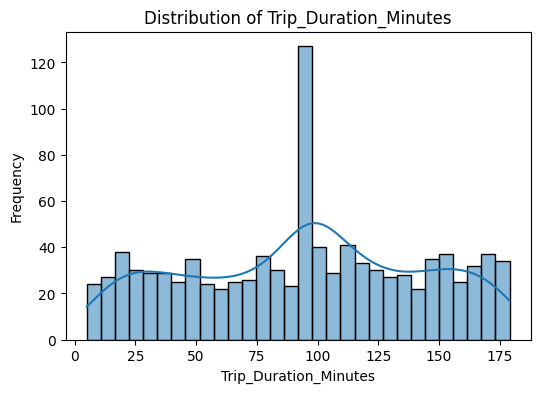

In [35]:
# Visualization Histogram

plt.figure(figsize=(6,4))
sns.histplot(df[col], kde=True, bins=30)
plt.title(f"Distribution of {col}")
plt.xlabel(col)
plt.ylabel("Frequency")

In [36]:
categorical_features = df.select_dtypes(include='object').columns.tolist()
print("\nCategorical features:", categorical_features)


Categorical features: ['Trip_ID', 'Mode_of_Transport', 'Departure_Station', 'Arrival_Station', 'Day_of_Week']


In [37]:
for col in categorical_features:
    print(f"\n--- {col} ---")
    print(df[col].value_counts())
    print("\nProportion:")
    print(df[col].value_counts(normalize=True))


--- Trip_ID ---
Trip_ID
TRIP0001    1
TRIP0002    1
TRIP0003    1
TRIP0004    1
TRIP0005    1
           ..
TRIP0996    1
TRIP0997    1
TRIP0998    1
TRIP0999    1
TRIP1000    1
Name: count, Length: 1000, dtype: int64

Proportion:
Trip_ID
TRIP0001    0.001
TRIP0002    0.001
TRIP0003    0.001
TRIP0004    0.001
TRIP0005    0.001
            ...  
TRIP0996    0.001
TRIP0997    0.001
TRIP0998    0.001
TRIP0999    0.001
TRIP1000    0.001
Name: proportion, Length: 1000, dtype: float64

--- Mode_of_Transport ---
Mode_of_Transport
Bus      147
Tram     138
bus      137
train    123
Train    120
FERRY    119
Ferry    118
fErry     50
BUS       48
Name: count, dtype: int64

Proportion:
Mode_of_Transport
Bus      0.147
Tram     0.138
bus      0.137
train    0.123
Train    0.120
FERRY    0.119
Ferry    0.118
fErry    0.050
BUS      0.048
Name: proportion, dtype: float64

--- Departure_Station ---
Departure_Station
North Station    171
Downtown         167
West End         159
Central          158

In [38]:
# Drop the identifier (Trip_ID)
df = df.drop(columns=['Trip_ID'])

In [39]:
print("Categorical features for analysis:", categorical_features)

Categorical features for analysis: ['Trip_ID', 'Mode_of_Transport', 'Departure_Station', 'Arrival_Station', 'Day_of_Week']


In [40]:
df.head(2)

,Mode_of_Transport,Departure_Station,Arrival_Station,Departure_Time,Passenger_Count,Fare_Amount,Trip_Duration_Minutes,Trip_Date,Day_of_Week
0,FERRY,West End,airport,2024-01-01 06:00:00,21.0,4.343642,26.0,2024-01-01,Sunday
1,Tram,North Station,Downtown,2024-01-01 06:01:00,46.0,20.673380,134.0,2024-01-01,Saturday


In [41]:
df.describe()

,Departure_Time,Passenger_Count,Fare_Amount,Trip_Duration_Minutes,Trip_Date
count,1000,1000.000000,1000.000000,1000.000000,1000
mean,2024-01-01 14:19:30,49.039000,25.365053,94.593000,2024-01-21 08:03:50.400000
min,2024-01-01 06:00:00,1.000000,0.500576,5.000000,2024-01-01 00:00:00
25%,2024-01-01 10:09:45,28.000000,13.917364,55.000000,2024-01-11 00:00:00
50%,2024-01-01 14:19:30,48.000000,25.403856,97.500000,2024-01-21 00:00:00
75%,2024-01-01 18:29:15,70.000000,36.580122,132.250000,2024-02-01 00:00:00
max,2024-01-01 22:39:00,99.000000,49.945184,179.000000,2024-02-11 00:00:00
std,NaN,26.277709,13.721526,48.043673,NaN


In [42]:
df['Trip_Date'] = pd.to_datetime(df['Trip_Date'])

# Extract useful time features
df['Year'] = df['Trip_Date'].dt.year
df['Month'] = df['Trip_Date'].dt.month
df['Day'] = df['Trip_Date'].dt.day
df['Day_of_Week'] = df['Trip_Date'].dt.day_name()
df['Hour'] = df['Trip_Date'].dt.hour

In [43]:
null_vals = df.isnull().sum()
null_vals

Mode_of_Transport        0
Departure_Station        0
Arrival_Station          0
Departure_Time           0
Passenger_Count          0
Fare_Amount              0
Trip_Duration_Minutes    0
Trip_Date                0
Day_of_Week              0
Year                     0
Month                    0
Day                      0
Hour                     0
dtype: int64

In [44]:
# Standadizing the mode of transportation category
df['Mode_of_Transport'] = df['Mode_of_Transport'].str.strip().str.lower()

In [45]:
print(df['Mode_of_Transport'].value_counts(normalize=True))

Mode_of_Transport
bus      0.332
ferry    0.287
train    0.243
tram     0.138
Name: proportion, dtype: float64


In [46]:
# Standadize Departure_Station and Arrival Station (Central and Airport)

df['Departure_Station'] = df['Departure_Station'].str.strip().str.title()
df['Arrival_Station'] = df['Arrival_Station'].str.strip().str.title()

In [47]:
print(df['Departure_Station'].value_counts())
print(df['Arrival_Station'].value_counts())

Departure_Station
Central          208
North Station    171
Downtown         167
West End         159
Airport          157
South Point      138
Name: count, dtype: int64
Arrival_Station
Airport          213
South Point      171
Downtown         168
West End         163
Central          160
North Station    125
Name: count, dtype: int64


In [48]:
df.head(2)

,Mode_of_Transport,Departure_Station,Arrival_Station,Departure_Time,Passenger_Count,Fare_Amount,Trip_Duration_Minutes,Trip_Date,Day_of_Week,Year,Month,Day,Hour
0,ferry,West End,Airport,2024-01-01 06:00:00,21.0,4.343642,26.0,2024-01-01,Monday,2024,1,1,0
1,tram,North Station,Downtown,2024-01-01 06:01:00,46.0,20.673380,134.0,2024-01-01,Monday,2024,1,1,0


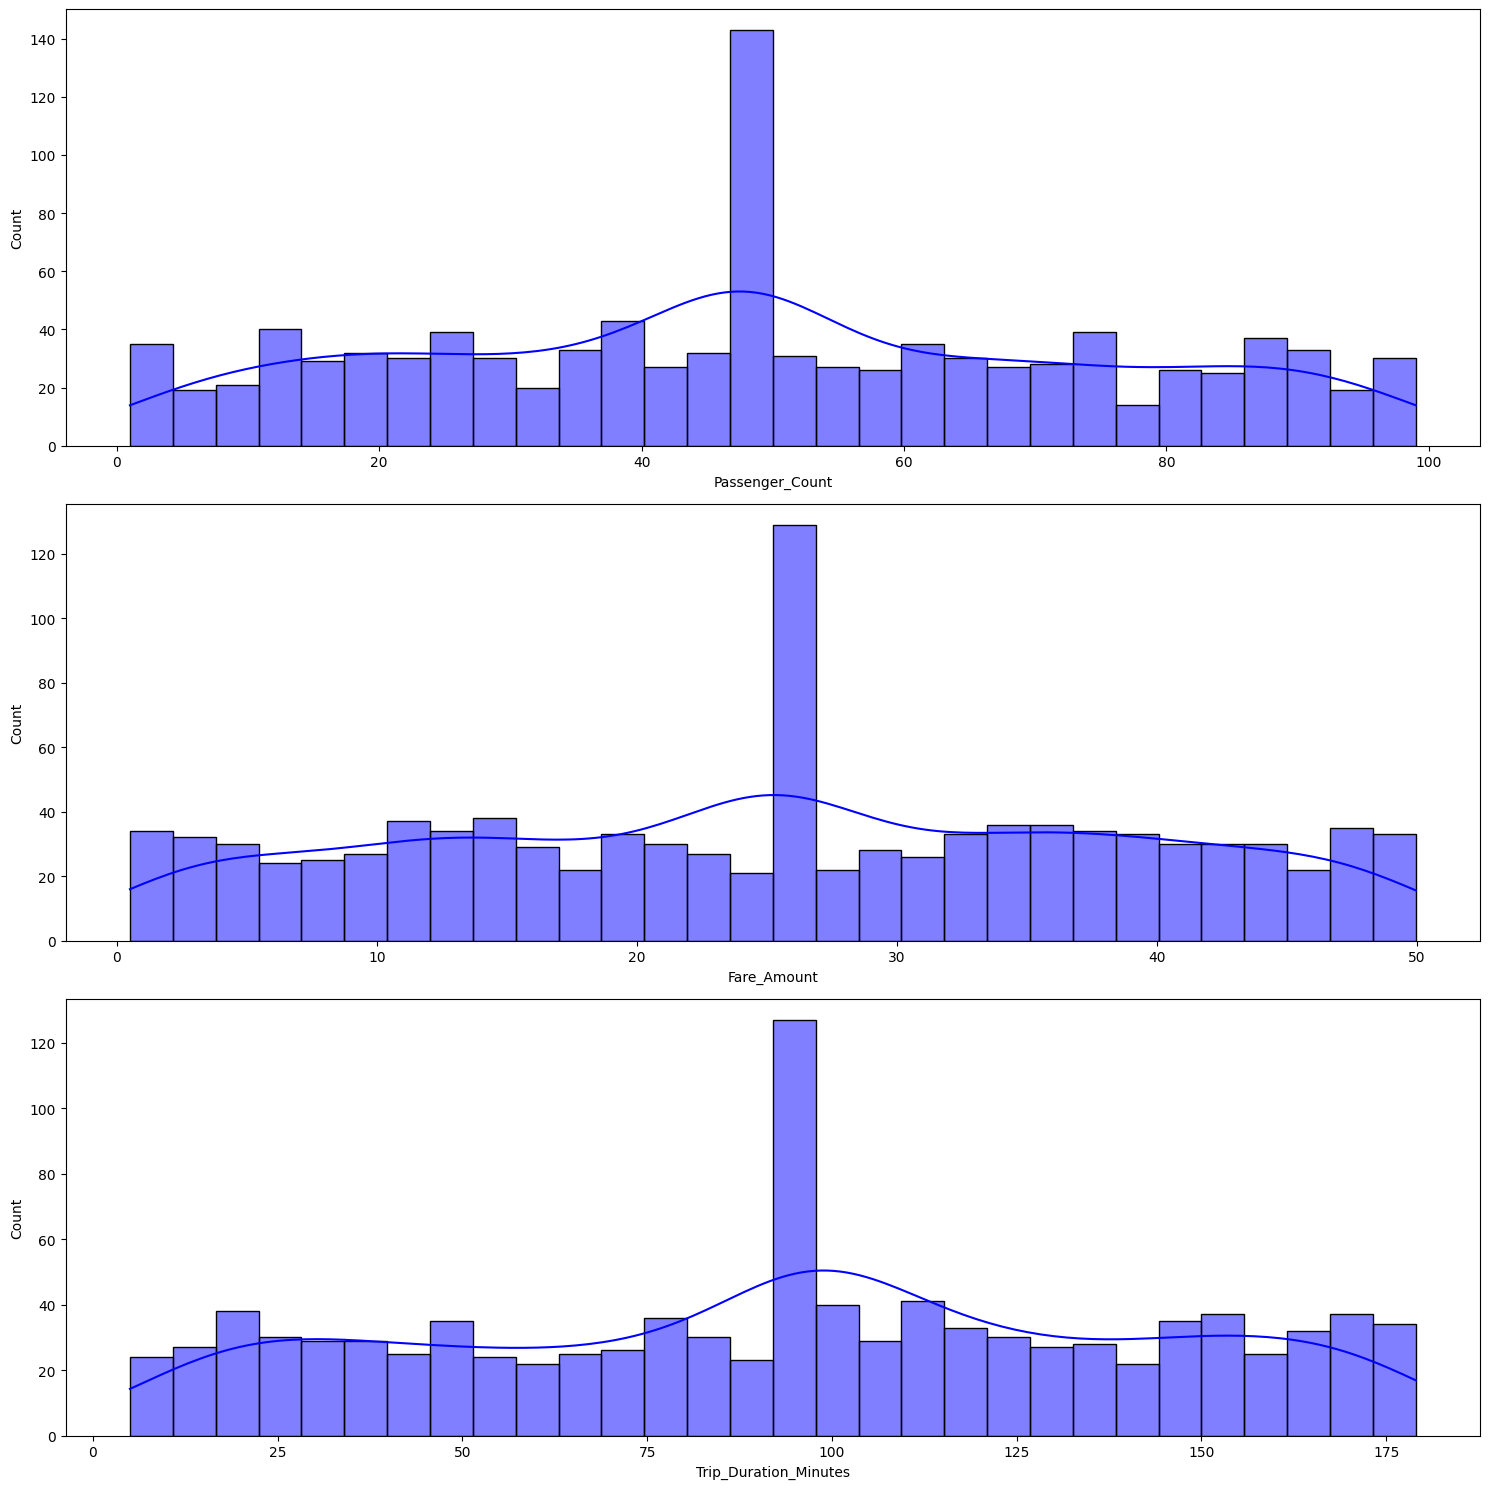

In [49]:
fig, position = plt.subplots(nrows=3, figsize=(15, 15))
position = position.flatten()

for index, column_name in enumerate(numerical_columns):
    sns.histplot(df[column_name], color="blue", bins=30, kde=True, ax=position[index])

plt.tight_layout()

C:\Users\iheom\AppData\Local\Temp\ipykernel_44636\2637757231.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, order=df[col].value_counts().index, palette="viridis")


Text(0, 0.5, 'Count')

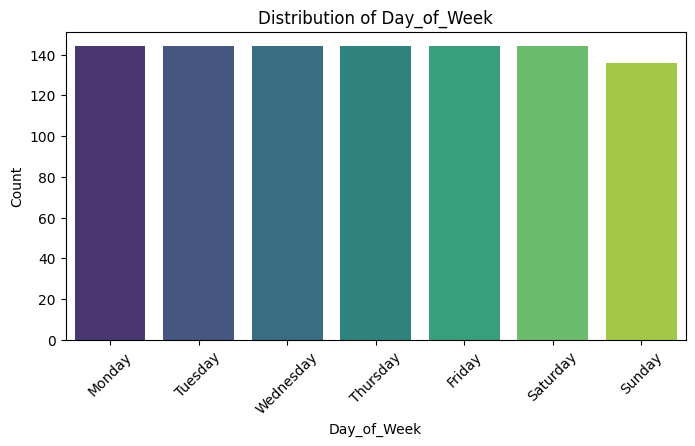

In [50]:
# Visualization 
plt.figure(figsize=(8,4))
sns.countplot(x=col, data=df, order=df[col].value_counts().index, palette="viridis")
plt.title(f"Distribution of {col}")
plt.xticks(rotation=45)
plt.xlabel(col)
plt.ylabel("Count")

In [51]:
df.head(2)

,Mode_of_Transport,Departure_Station,Arrival_Station,Departure_Time,Passenger_Count,Fare_Amount,Trip_Duration_Minutes,Trip_Date,Day_of_Week,Year,Month,Day,Hour
0,ferry,West End,Airport,2024-01-01 06:00:00,21.0,4.343642,26.0,2024-01-01,Monday,2024,1,1,0
1,tram,North Station,Downtown,2024-01-01 06:01:00,46.0,20.673380,134.0,2024-01-01,Monday,2024,1,1,0


In [52]:
df.describe()

,Departure_Time,Passenger_Count,Fare_Amount,Trip_Duration_Minutes,Trip_Date,Year,Month,Day,Hour
count,1000,1000.000000,1000.000000,1000.000000,1000,1000.0,1000.00000,1000.000000,1000.0
mean,2024-01-01 14:19:30,49.039000,25.365053,94.593000,2024-01-21 08:03:50.400000,2024.0,1.25600,13.400000,0.0
min,2024-01-01 06:00:00,1.000000,0.500576,5.000000,2024-01-01 00:00:00,2024.0,1.00000,1.000000,0.0
25%,2024-01-01 10:09:45,28.000000,13.917364,55.000000,2024-01-11 00:00:00,2024.0,1.00000,6.000000,0.0
50%,2024-01-01 14:19:30,48.000000,25.403856,97.500000,2024-01-21 00:00:00,2024.0,1.00000,11.000000,0.0
75%,2024-01-01 18:29:15,70.000000,36.580122,132.250000,2024-02-01 00:00:00,2024.0,2.00000,21.000000,0.0
max,2024-01-01 22:39:00,99.000000,49.945184,179.000000,2024-02-11 00:00:00,2024.0,2.00000,31.000000,0.0
std,NaN,26.277709,13.721526,48.043673,NaN,0.0,0.43664,9.037792,0.0


In [53]:
### Visualizing 

In [54]:
df.columns

Index(['Mode_of_Transport', 'Departure_Station', 'Arrival_Station',
       'Departure_Time', 'Passenger_Count', 'Fare_Amount',
       'Trip_Duration_Minutes', 'Trip_Date', 'Day_of_Week', 'Year', 'Month',
       'Day', 'Hour'],
      dtype='object')

In [55]:
df.head()

,Mode_of_Transport,Departure_Station,Arrival_Station,Departure_Time,Passenger_Count,Fare_Amount,Trip_Duration_Minutes,Trip_Date,Day_of_Week,Year,Month,Day,Hour
0,ferry,West End,Airport,2024-01-01 06:00:00,21.0,4.343642,26.0,2024-01-01,Monday,2024,1,1,0
1,tram,North Station,Downtown,2024-01-01 06:01:00,46.0,20.673380,134.0,2024-01-01,Monday,2024,1,1,0
2,bus,Central,North Station,2024-01-01 06:02:00,91.0,25.403856,97.5,2024-01-01,Monday,2024,1,1,0
3,ferry,Downtown,Central,2024-01-01 06:03:00,27.0,3.767487,97.5,2024-01-01,Monday,2024,1,1,0
4,ferry,Downtown,Central,2024-01-01 06:04:00,66.0,25.403856,97.5,2024-01-01,Monday,2024,1,1,0


# Univariate Analysis

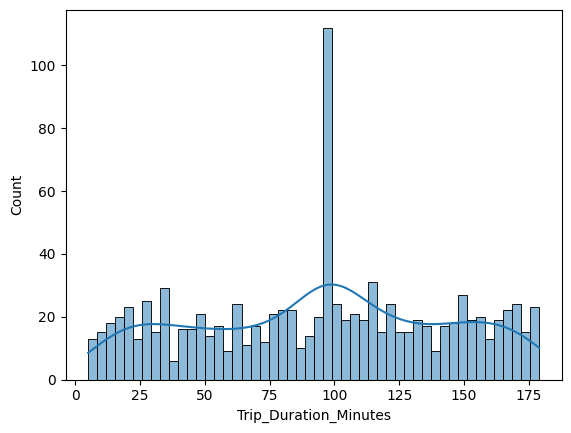

In [56]:
# Example: Distribution of trip durations
sns.histplot(df['Trip_Duration_Minutes'], bins=50, kde=True);

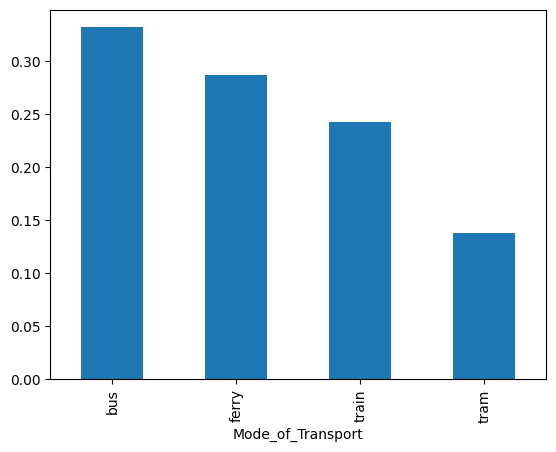

In [57]:
# Example: Share of transport modes
df['Mode_of_Transport'].value_counts(normalize=True).plot(kind='bar');

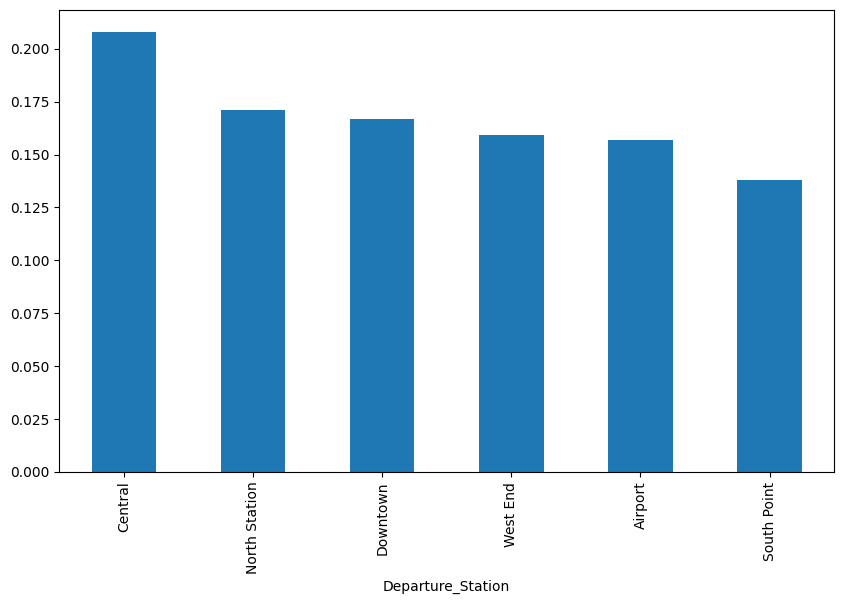

In [58]:
# Departure station
plt.figure(figsize=(10,6))
df['Departure_Station'].value_counts(normalize=True).plot(kind='bar');

# Bivariate Analysis

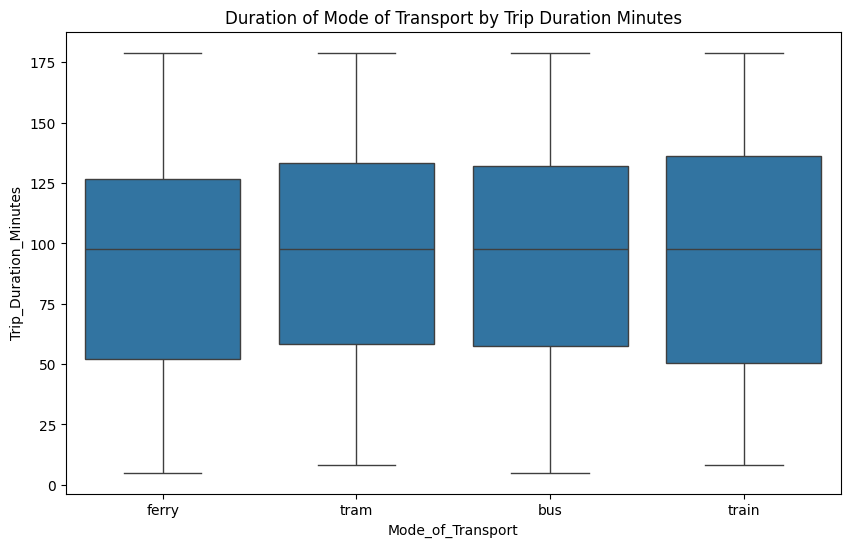

In [59]:
# Example: Distribution of trip durations
plt.figure(figsize=(10,6))
sns.boxplot(x="Mode_of_Transport", y="Trip_Duration_Minutes", data=df)
plt.title("Duration of Mode of Transport by Trip Duration Minutes");

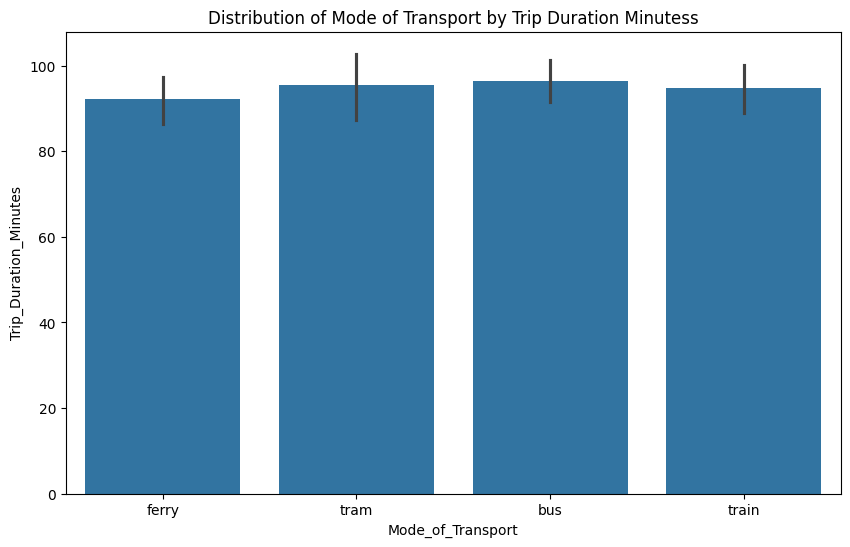

In [60]:
# Example: Distribution of trip durations
plt.figure(figsize=(10,6))
sns.barplot(x="Mode_of_Transport", y="Trip_Duration_Minutes", data=df)
plt.title("Distribution of Mode of Transport by Trip Duration Minutess")
plt.grid=True

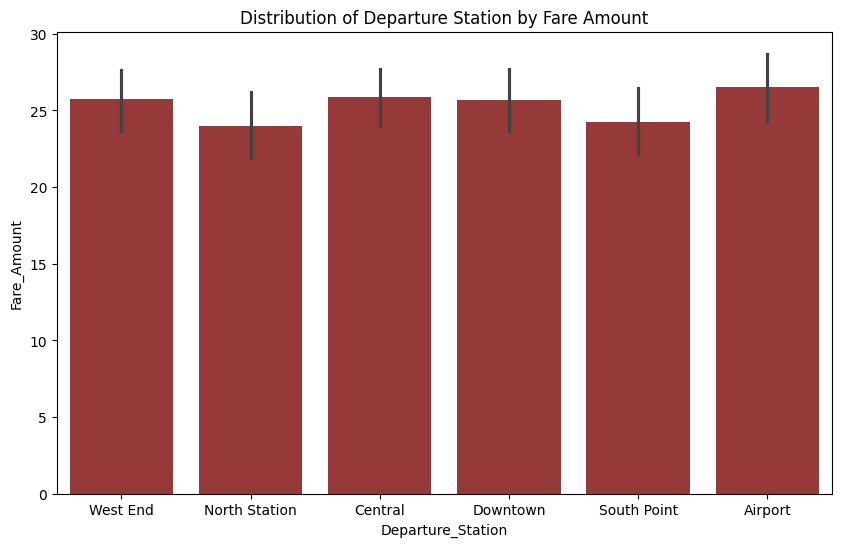

In [61]:
# Example: Distribution of trip durations
plt.figure(figsize=(10,6))
sns.barplot(x="Departure_Station", y="Fare_Amount", data=df, color="brown")
plt.title("Distribution of Departure Station by Fare Amount")
plt.grid=True

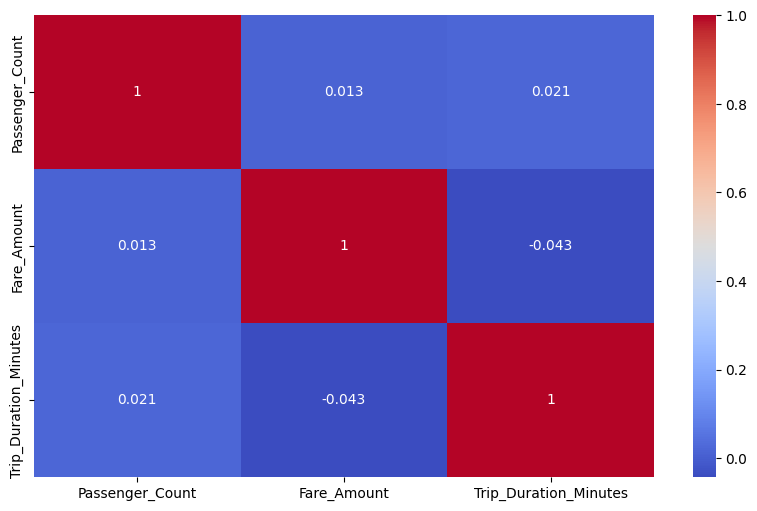

In [62]:
plt.figure(figsize=(10,6))
corr = df[["Passenger_Count", "Fare_Amount", "Trip_Duration_Minutes"]].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title = ("Correlation for Numerical Data")

<Axes: >

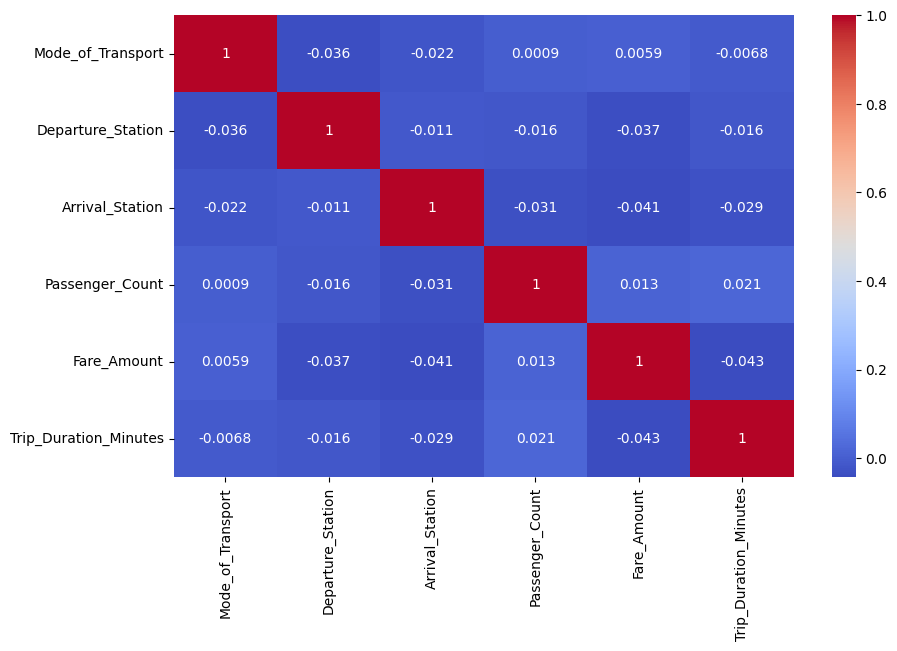

In [63]:
df_encoded = df.copy()
for col in ["Mode_of_Transport", "Departure_Station", "Arrival_Station"]:
    df_encoded[col] = df_encoded[col].astype("category").cat.codes

corr = df_encoded[["Mode_of_Transport", "Departure_Station", "Arrival_Station",
                   "Passenger_Count", "Fare_Amount", "Trip_Duration_Minutes"]].corr()

plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap="coolwarm")

In [64]:
# Multi-way pivot example
pd.pivot_table(df, values='Fare_Amount', index='Mode_of_Transport', columns='Day_of_Week', aggfunc='mean')

Day_of_Week,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
Mode_of_Transport,,,,,,,
bus,26.708965,24.671193,25.324837,24.755942,29.156406,25.119389,23.655048
ferry,25.568046,22.028308,21.995964,24.172802,27.359084,25.383206,25.859535
train,28.130494,26.509341,24.288824,23.510825,26.710539,26.535269,26.913887
tram,25.321891,22.364534,24.242969,26.153692,29.135627,25.262972,25.089565


In [65]:
table = pd.pivot_table(df, values='Fare_Amount', index='Mode_of_Transport', columns='Day_of_Week', aggfunc='mean')

# Format with $ and 3 decimal places
table = table.map(lambda x: f"${x:.3f}")

In [66]:
table

Day_of_Week,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
Mode_of_Transport,,,,,,,
bus,$26.709,$24.671,$25.325,$24.756,$29.156,$25.119,$23.655
ferry,$25.568,$22.028,$21.996,$24.173,$27.359,$25.383,$25.860
train,$28.130,$26.509,$24.289,$23.511,$26.711,$26.535,$26.914
tram,$25.322,$22.365,$24.243,$26.154,$29.136,$25.263,$25.090


In [67]:
table = pd.pivot_table(df, values='Fare_Amount', index='Mode_of_Transport', columns='Day_of_Week', aggfunc='mean')

day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
table = table.reindex(columns=day_order)

# Format with $ and 3 decimal places
table = table.map(lambda x: f"${x:.3f}")
table

Day_of_Week,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
Mode_of_Transport,,,,,,,
bus,$24.671,$25.119,$23.655,$29.156,$26.709,$25.325,$24.756
ferry,$22.028,$25.383,$25.860,$27.359,$25.568,$21.996,$24.173
train,$26.509,$26.535,$26.914,$26.711,$28.130,$24.289,$23.511
tram,$22.365,$25.263,$25.090,$29.136,$25.322,$24.243,$26.154


In [68]:
table = pd.pivot_table(df, values='Fare_Amount', index='Mode_of_Transport', columns='Day_of_Week', aggfunc='mean')

# Format with $ and 3 decimal places using .map (new syntax)
table = table.map(lambda x: f"${x:.3f}")

### Convert departure time to extract hour

In [69]:
# Convert Departure_Time to datetime and extract hour
df['Departure_Time'] = pd.to_datetime(df['Departure_Time'], errors='coerce')
df['Hour'] = df['Departure_Time'].dt.hour

# Key Findings and Insights

### 1. Trip Performance Overview

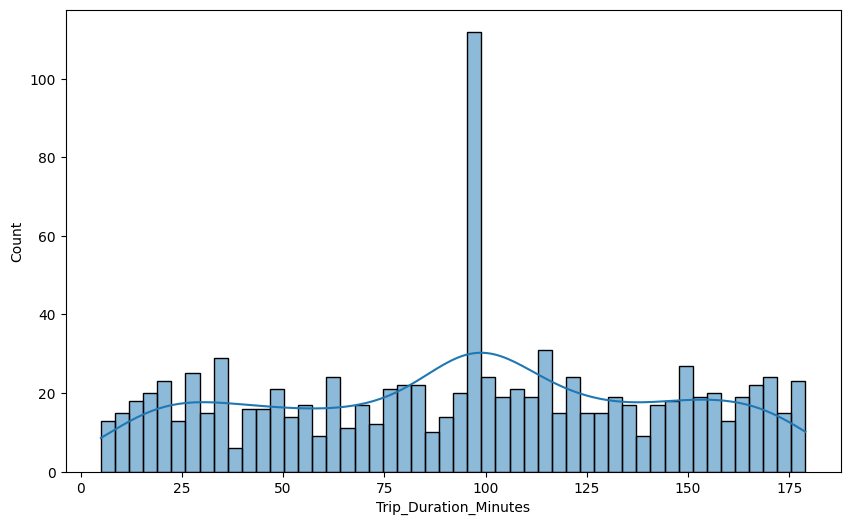

In [70]:
# Example: Distribution of trip durations
plt.figure(figsize=(10,6))
sns.histplot(df['Trip_Duration_Minutes'], bins=50, kde=True);

In [71]:
df.head(2)

,Mode_of_Transport,Departure_Station,Arrival_Station,Departure_Time,Passenger_Count,Fare_Amount,Trip_Duration_Minutes,Trip_Date,Day_of_Week,Year,Month,Day,Hour
0,ferry,West End,Airport,2024-01-01 06:00:00,21.0,4.343642,26.0,2024-01-01,Monday,2024,1,1,6
1,tram,North Station,Downtown,2024-01-01 06:01:00,46.0,20.673380,134.0,2024-01-01,Monday,2024,1,1,6


In [72]:
import importlib

In [73]:
importlib.reload(plt)

<module 'matplotlib.pyplot' from 'C:\\Users\\iheom\\AppData\\Roaming\\Python\\Python312\\site-packages\\matplotlib\\pyplot.py'>

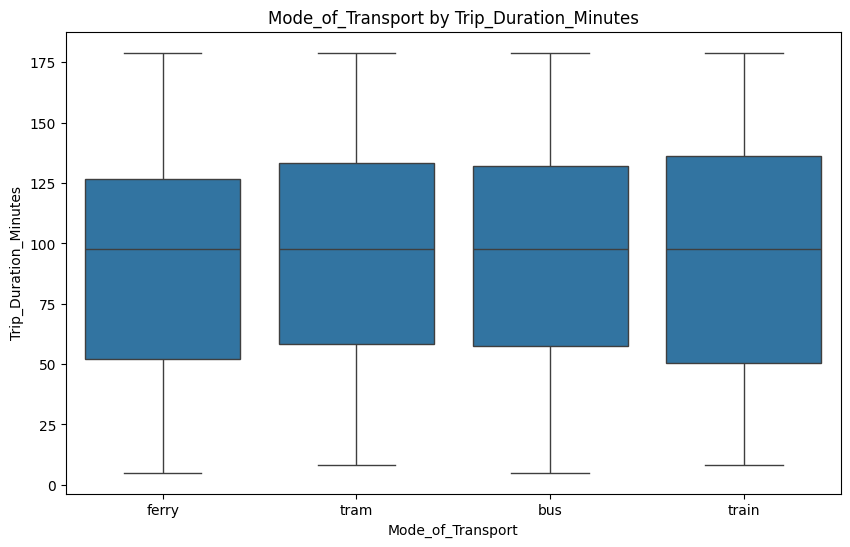

In [74]:
plt.figure(figsize=(10,6))
sns.boxplot(x="Mode_of_Transport", y="Trip_Duration_Minutes", data=df)
plt.title("Mode_of_Transport by Trip_Duration_Minutes")
plt.show()

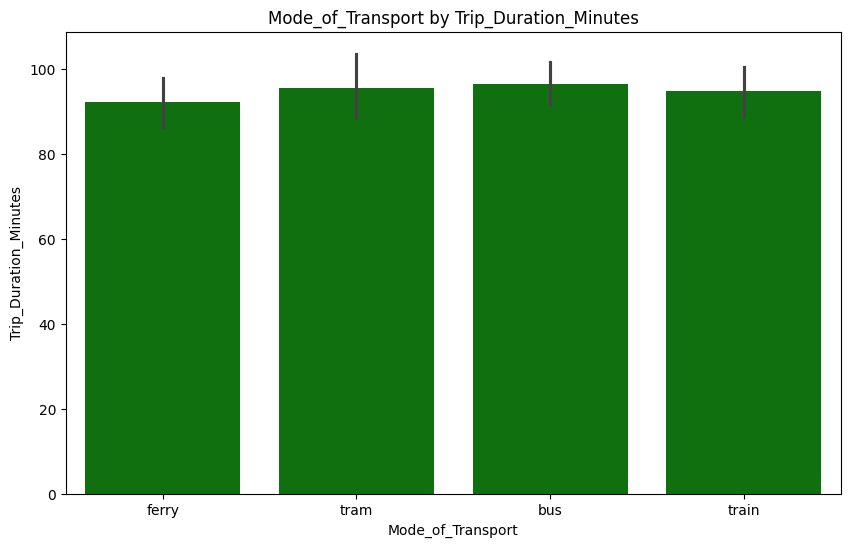

In [75]:
plt.figure(figsize=(10,6))
sns.barplot(x="Mode_of_Transport", y="Trip_Duration_Minutes", color="green", data=df)
plt.title("Mode_of_Transport by Trip_Duration_Minutes");

In [76]:
df.head(2)

,Mode_of_Transport,Departure_Station,Arrival_Station,Departure_Time,Passenger_Count,Fare_Amount,Trip_Duration_Minutes,Trip_Date,Day_of_Week,Year,Month,Day,Hour
0,ferry,West End,Airport,2024-01-01 06:00:00,21.0,4.343642,26.0,2024-01-01,Monday,2024,1,1,6
1,tram,North Station,Downtown,2024-01-01 06:01:00,46.0,20.673380,134.0,2024-01-01,Monday,2024,1,1,6


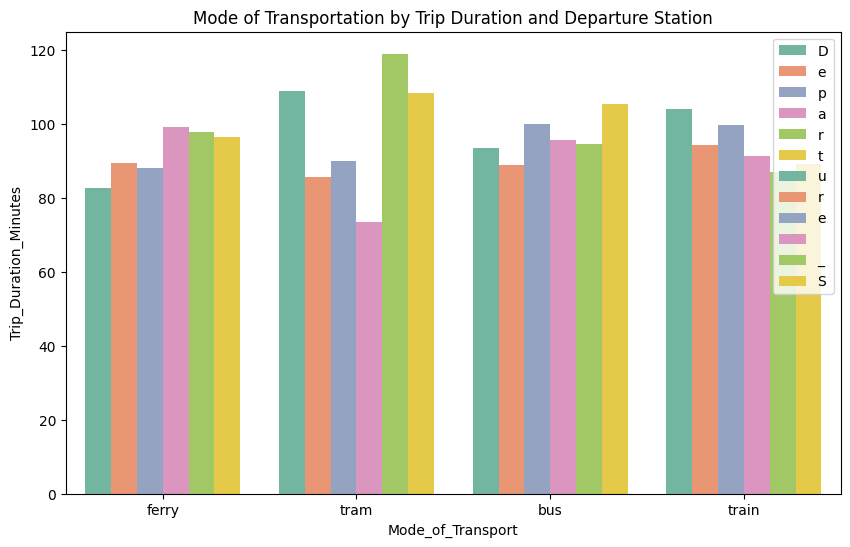

In [77]:
plt.figure(figsize=(10, 6))
sns.barplot(x="Mode_of_Transport", y="Trip_Duration_Minutes", hue="Departure_Station", data=df, palette="Set2", errorbar=None)
plt.title("Mode of Transportation by Trip Duration and Departure Station")
plt.legend("Departure _Station", loc="upper right")

### 2. Passenger Behavior and Demand Patterns

C:\Users\iheom\AppData\Local\Temp\ipykernel_44636\2846731887.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='Day_of_Week', y='Passenger_Count', estimator='mean', ci=None, palette='viridis')
C:\Users\iheom\AppData\Local\Temp\ipykernel_44636\2846731887.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Day_of_Week', y='Passenger_Count', estimator='mean', ci=None, palette='viridis')


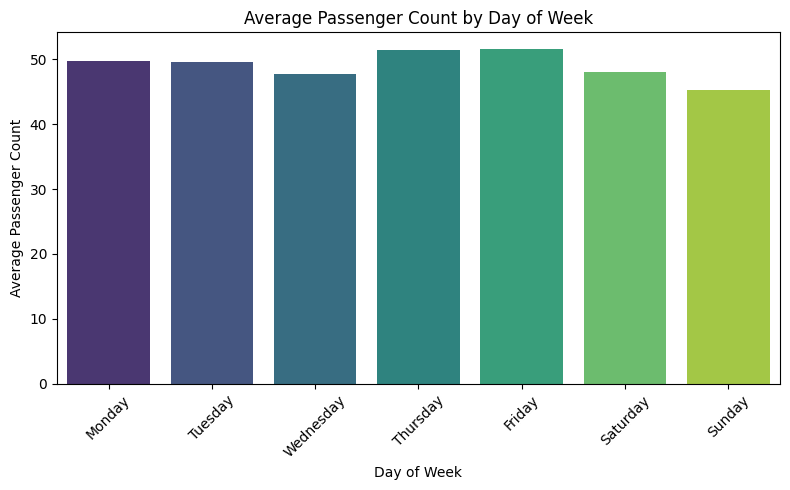

In [78]:
# 1. Passenger_Count vs. Day_of_Week → Daily demand trend
plt.figure(figsize=(8, 5))
sns.barplot(data=df, x='Day_of_Week', y='Passenger_Count', estimator='mean', ci=None, palette='viridis')
plt.title('Average Passenger Count by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Average Passenger Count')
plt.xticks(rotation=45)
plt.tight_layout()

C:\Users\iheom\AppData\Local\Temp\ipykernel_44636\3625107638.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Mode_of_Transport', y='Passenger_Count', palette='Set2')


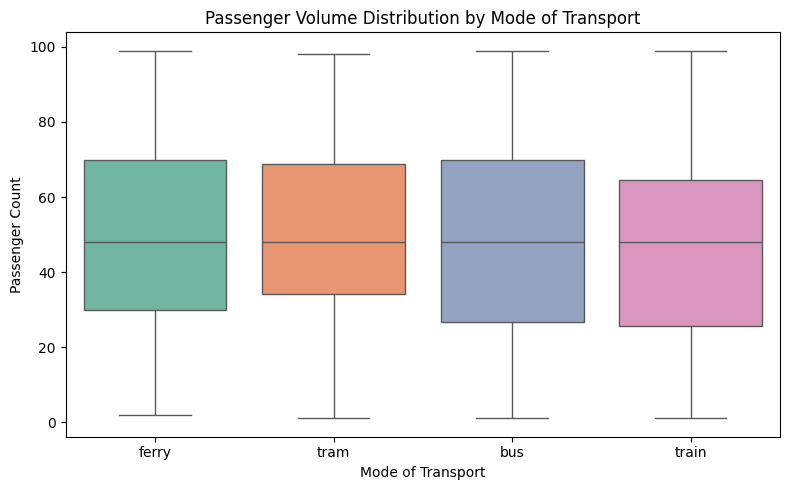

In [79]:
# 2. Passenger_Count vs. Mode_of_Transport → Compare passenger volume by mode
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='Mode_of_Transport', y='Passenger_Count', palette='Set2')
plt.title('Passenger Volume Distribution by Mode of Transport')
plt.xlabel('Mode of Transport')
plt.ylabel('Passenger Count')
plt.tight_layout()

C:\Users\iheom\AppData\Local\Temp\ipykernel_44636\2438939585.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Mode_of_Transport', y='Passenger_Count', palette='Set2')


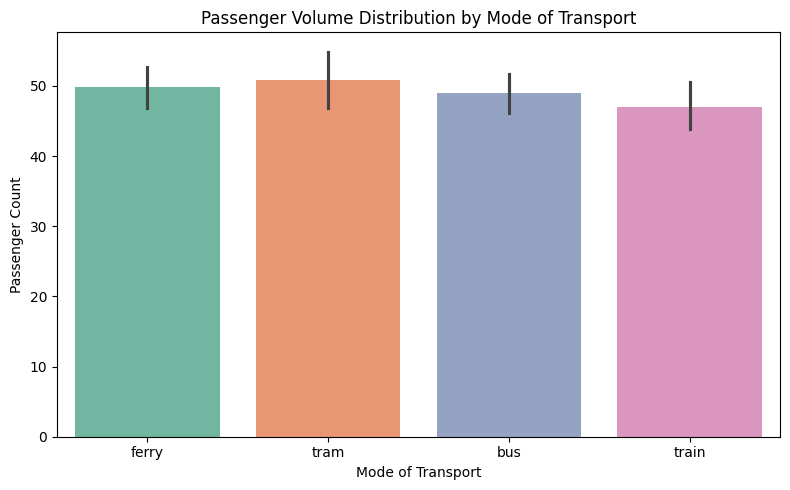

In [80]:
# 2. Passenger_Count vs. Mode_of_Transport → Compare passenger volume by mode
plt.figure(figsize=(8, 5))
sns.barplot(data=df, x='Mode_of_Transport', y='Passenger_Count', palette='Set2')
plt.title('Passenger Volume Distribution by Mode of Transport')
plt.xlabel('Mode of Transport')
plt.ylabel('Passenger Count')
plt.tight_layout()

Text(0.5, 1.0, 'Passenger Volume by Month (Seasonality)')

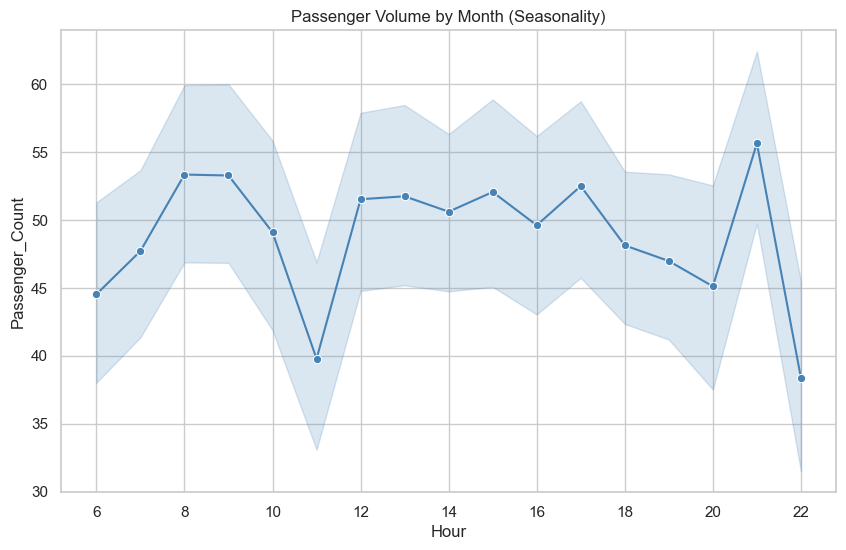

In [81]:
# 3. Line Chart: Passenger count by time of day
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
ax = sns.lineplot(x='Hour', y='Passenger_Count', marker='o', color='steelblue', data=df)

# Add title
plt.title("Passenger Volume by Month (Seasonality)")

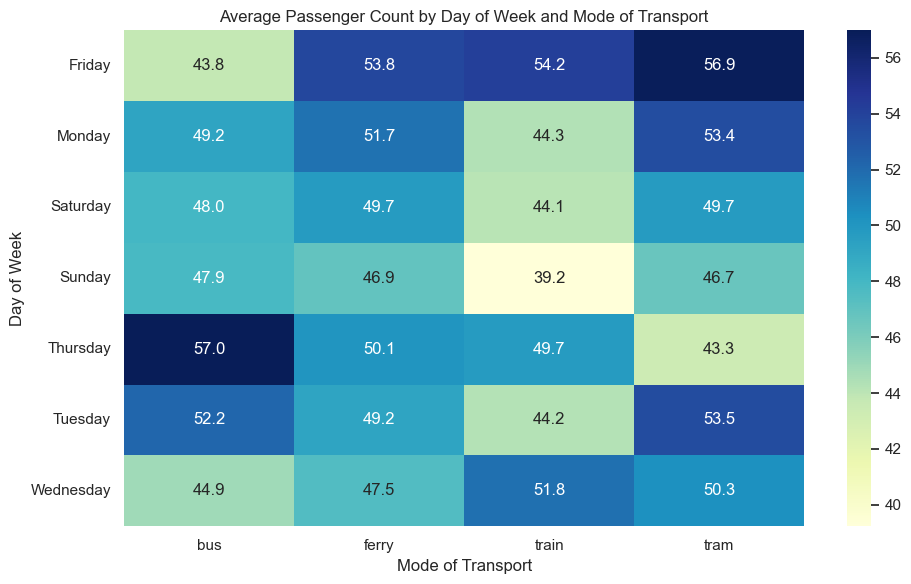

In [82]:
# 4. Multivariate: Passenger_Count, Day_of_Week, Mode_of_Transport → Combined view
plt.figure(figsize=(10, 6))
pivot_table = df.pivot_table(values='Passenger_Count', index='Day_of_Week', columns='Mode_of_Transport', aggfunc='mean')
sns.heatmap(pivot_table, cmap='YlGnBu', annot=True, fmt=".1f")
plt.title('Average Passenger Count by Day of Week and Mode of Transport')
plt.xlabel('Mode of Transport')
plt.ylabel('Day of Week')
plt.tight_layout()

<Figure size 1000x600 with 0 Axes>

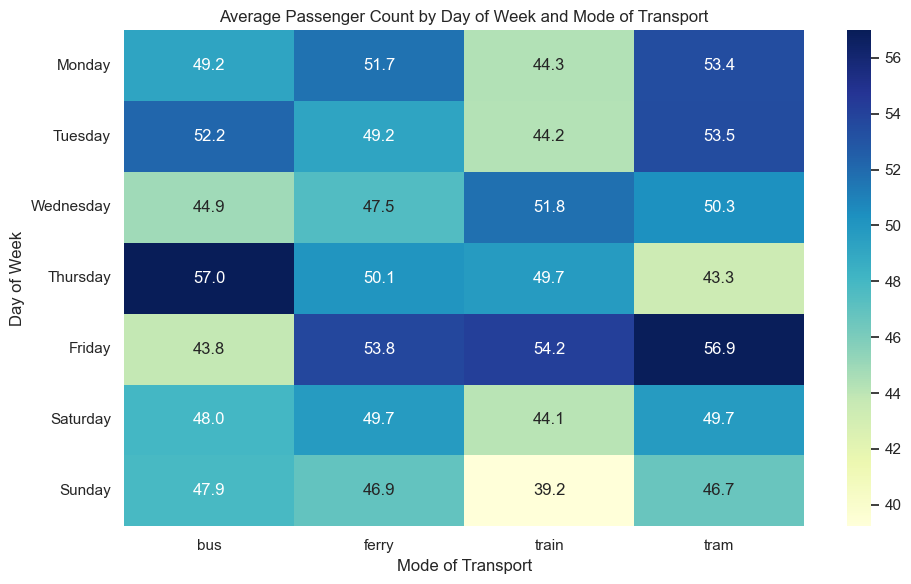

<Figure size 1000x600 with 0 Axes>

In [83]:
# 4. Multivariate: Passenger_Count, Day_of_Week, Mode_of_Transport → Combined view
plt.figure(figsize=(10, 6))
pivot_table = df.pivot_table(values='Passenger_Count', index='Day_of_Week', columns='Mode_of_Transport', aggfunc='mean')

# Reorder days from Monday to Sunday
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
pivot_table = pivot_table.reindex(day_order)

# Plot the heatmap
sns.heatmap(pivot_table, cmap='YlGnBu', annot=True, fmt=".1f")
plt.title('Average Passenger Count by Day of Week and Mode of Transport')
plt.xlabel('Mode of Transport')
plt.ylabel('Day of Week')
plt.tight_layout()
plt.figure(figsize=(10, 6))

### 3. Fare and Revenue Analysis

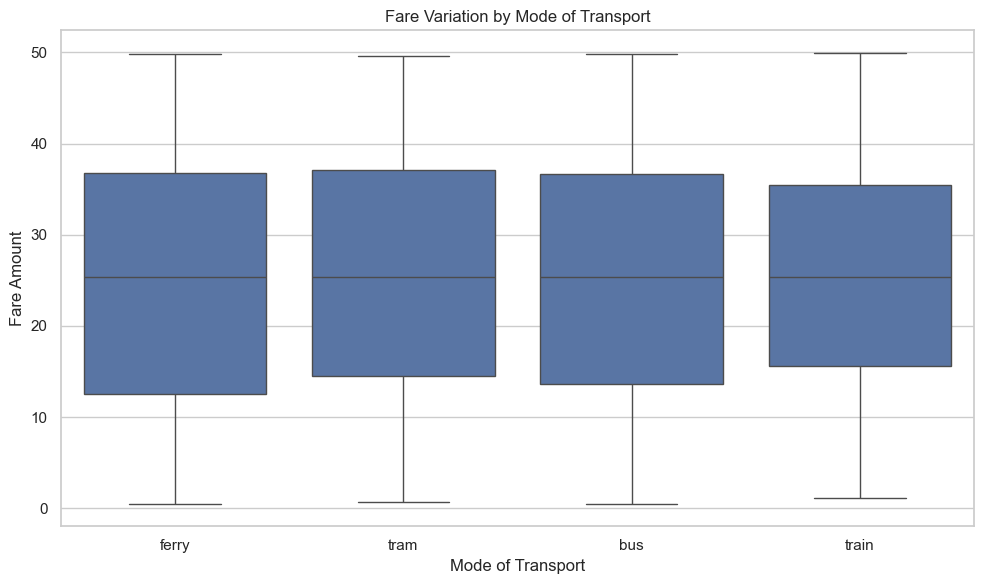

In [84]:
# Fare_Amount vs. Mode_of_Transport → Fare variation by mode.
plt.figure(figsize=(10,6))
sns.boxplot(x="Mode_of_Transport", y="Fare_Amount", data=df)
plt.title("Fare Variation by Mode of Transport")
plt.xlabel("Mode of Transport")
plt.ylabel("Fare Amount")
plt.tight_layout()

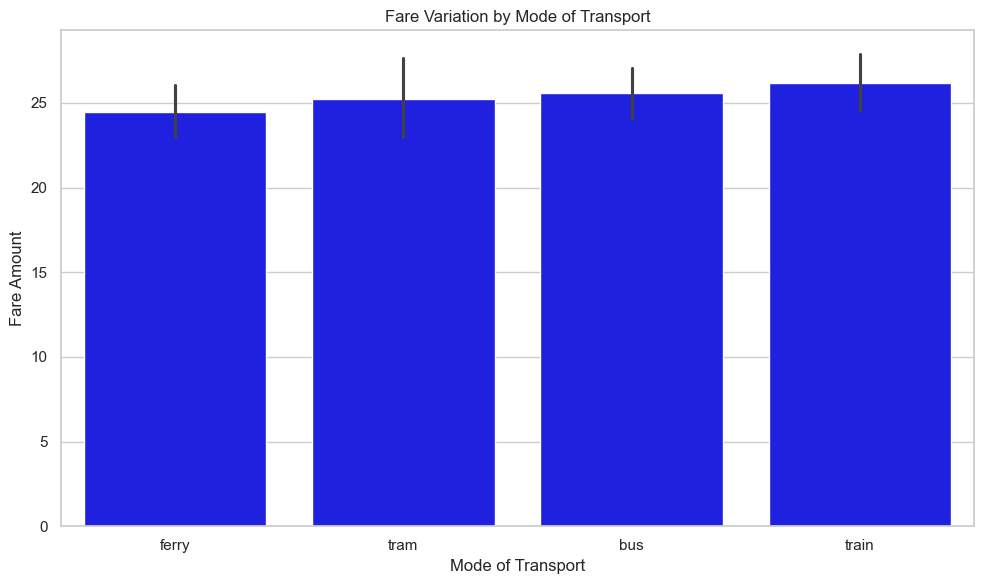

In [85]:
# Fare_Amount vs. Mode_of_Transport → Fare variation by mode.
plt.figure(figsize=(10,6))
sns.barplot(x="Mode_of_Transport", y="Fare_Amount", color="blue", data=df)
plt.title("Fare Variation by Mode of Transport")
plt.xlabel("Mode of Transport")
plt.ylabel("Fare Amount")
plt.tight_layout()

### 4. Trip Data Quality and Anomalies

### 5. Operational Insights and Efficiency Drivers

In [86]:
# Mode_of_Transport, Fare_Amount, Passenger_Count, Trip_Duration_Minutes → Identify operational drivers.

<Figure size 1000x600 with 0 Axes>

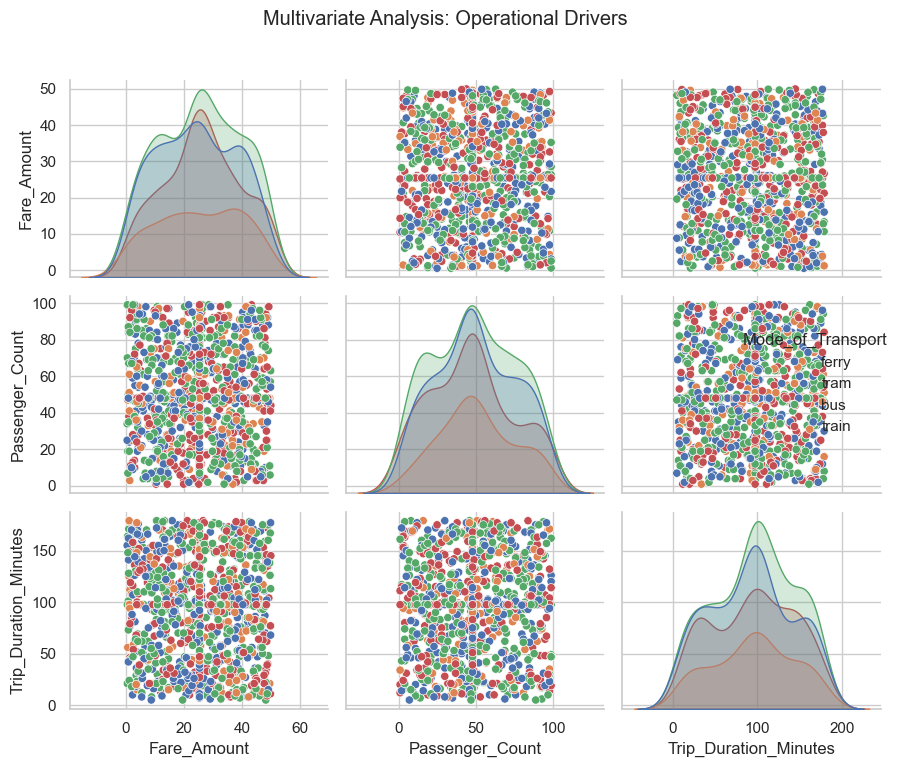

In [87]:
# ----- 6. Multivariate Analysis -----
plt.figure(figsize=(10,6))
sns.pairplot(df, hue="Mode_of_Transport",
             vars=["Fare_Amount", "Passenger_Count", "Trip_Duration_Minutes"])
plt.suptitle("Multivariate Analysis: Operational Drivers", y=1.02)
plt.tight_layout()